In [1]:
from github import Github
import pandas as pd
import numpy as np

labeled
labeled
review_requested
review_requested
review_requested
added_to_project
head_ref_force_pushed


In [16]:
gthub = Github('f9930aaececfa943f340a4477a5b2eebd3955b81')
repo = gthub.get_repo('twbs/bootstrap')
issues = repo.get_issues(state = 'open')

In [17]:
issues.totalCount

395

# Analysis
For this part, the quantitative analysis for the missing fields will be conducted. In this regard, all of the attributes of a commit will be analyzed. The attributes that will be analyzed are as follows:
- Assignee
- Labels
- Projects
- Milestone 
- Linked Pull Requests
- Comments
---
In order to shrink the dataset for an easier analysis firstly the issues which are problematic will be found. In order to find the problematic issues, the events generated for the attributes will be used.

In [18]:
events = ('added_to_project', 'assigned', 'labeled', 'milestoned', 'review_requested') 

In [21]:
problematic_issues = []
problems = np.zeros(6)
count = 0
for issue in issues:
    count += 1
    issue_events = issue.get_events()
    smell = [True, True, True, True, True, True]
    for event in issue_events:
        for label_idx in range(len(events)):
            if event.event == events[label_idx]:
                smell[label_idx] = False
    if issue.body != None:
        smell[5] = False
    for x in smell:
        if x == True:
            problematic_issues.append(issue)
            break
    for x_idx in range(len(smell)):
        if smell[x_idx] == True:
            problems[x_idx] += 1
            
print(count)
print('Number of issues with at least one missing field: ' + str(len(problematic_issues)))

395
Number of issues with at least one missing field: 395


Open issues: 395, Issues with some problem: 395


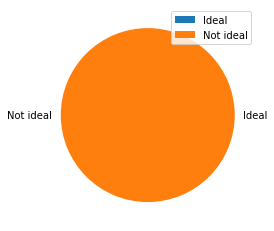

In [26]:
import matplotlib.pyplot as plt
lb1 = ['Ideal', 'Not ideal']
print('Open issues: ' + str(count) + ', Issues with some problem: ' + str(len(problematic_issues)))
fig, ax = plt.subplots()
ax.pie((count - len(problematic_issues) , len(problematic_issues)), labels = lb1)
ax.legend()

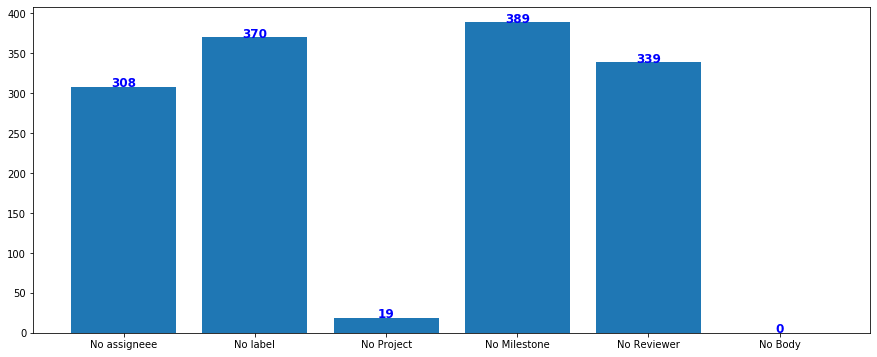

In [40]:
labels = ['No assigneee', 'No label', 'No Project', 'No Milestone', 'No Reviewer', 'No Body']
fig,ax = plt.subplots(figsize = (15,6))
ax.bar(labels, problems)
for x_idx in range(problems.size):
    ax.text(labels[x_idx], problems[x_idx], int(problems[x_idx]), fontdict = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'heavy',
        'size': 12,
        }, ha = 'center')